# Denoising with block matching and Keras
- Based on the following code: https://github.com/meisamrf/Image-denoising-tensorflow-keras
- The original paper can be found here: https://arxiv.org/abs/1704.03264

In [1]:
import os
import sys
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
from denoising.utils import visualize_image, addNoise, mse_psnr
import denoising.model as nmodel
import random

Using TensorFlow backend.


## Initialization

In [2]:
# Loading denoiser models
denoiser_bmcnn = nmodel.ImageDenoiser(graph = 'bmcnn', fs = 64, model_weights = "savedmodels/model_ver2.0.h5")
denoiser_ircnn = nmodel.ImageDenoiser(graph = 'ircnn', fs = 64, model_weights = "savedmodels/model_ircnn.h5")

## Adding noise and running the denoiser

### BMCCN

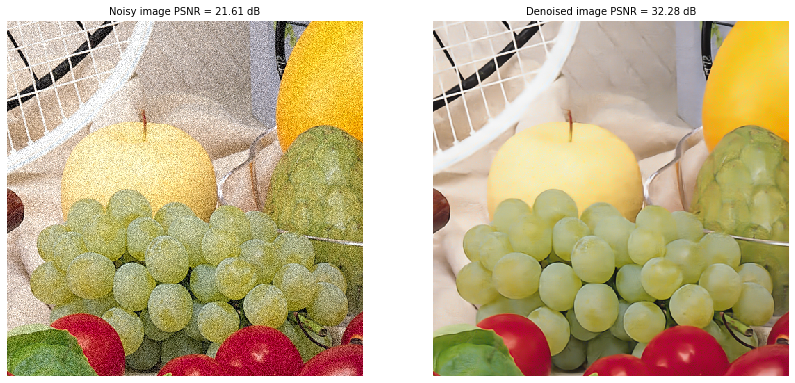

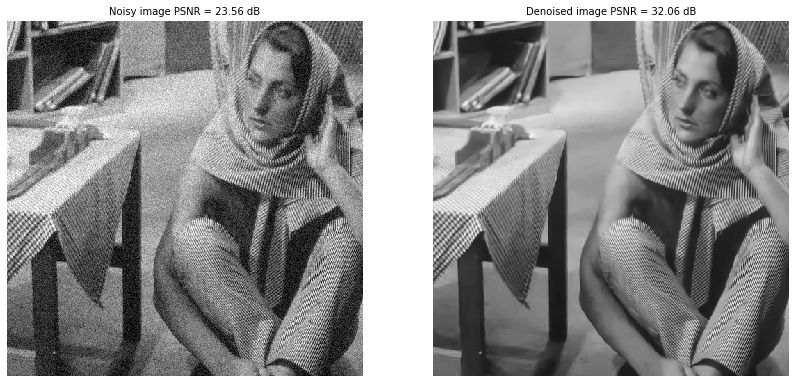

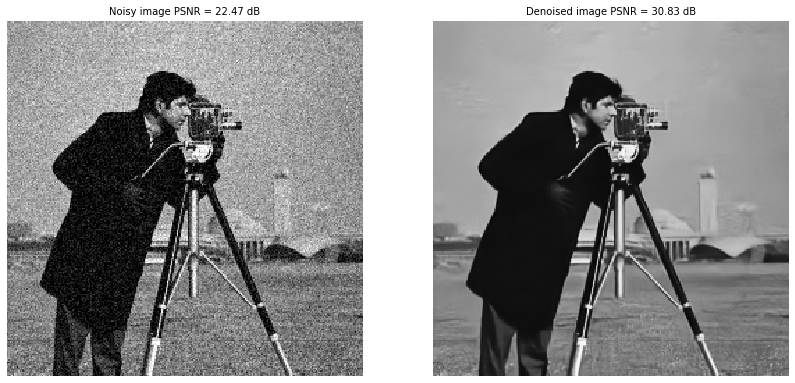

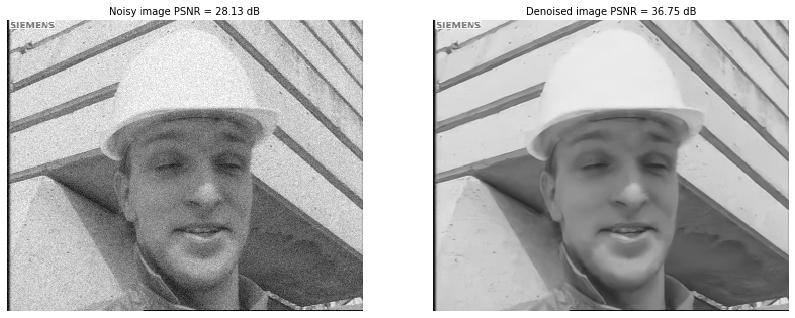

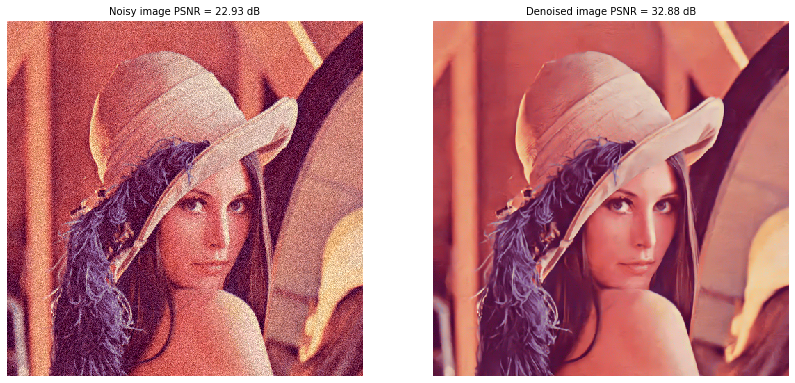

In [3]:
reference_images = ['testdata/fruits.png', 'testdata/barbara.png', 'testdata/cameraman.png',
                    'testdata/foreman.png', 'testdata/lena_color.png']

for image in reference_images:
    sigma = random.randrange(5, 40)

    img_ref = skimage.io.imread(image)
    img_n = addNoise(img_ref, sigma)

    im_out = denoiser_bmcnn.run(img_n, sigma)

    _, psnr_n = mse_psnr(img_ref, img_n)
    _, psnr_d = mse_psnr(img_ref, im_out)

    visualize_image(img_n, im_out, psnr_n, psnr_d)

### IRCCN

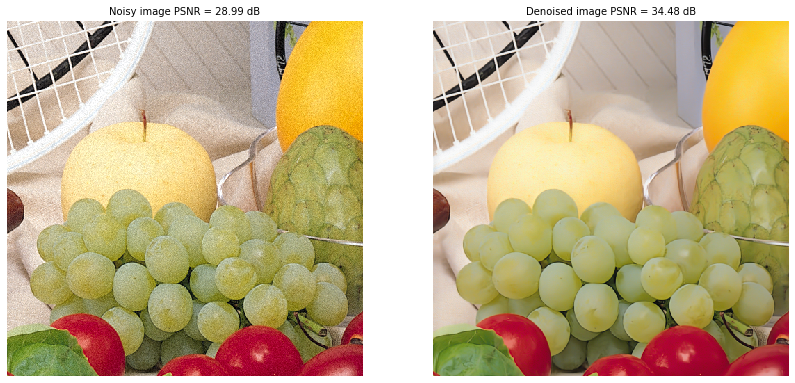

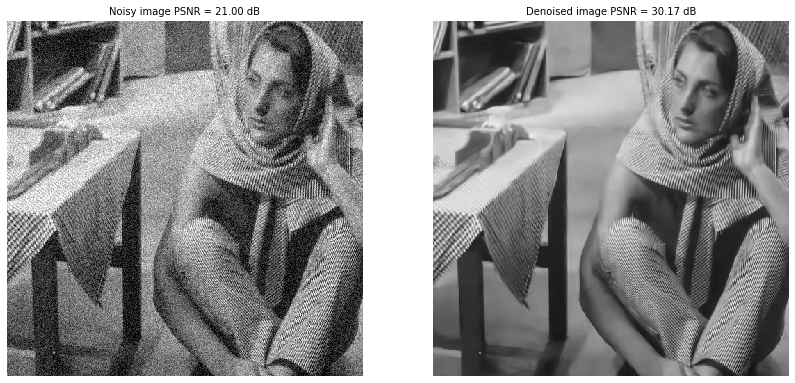

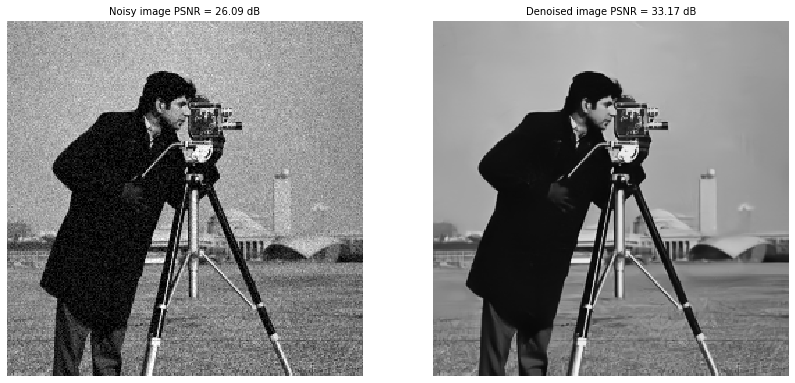

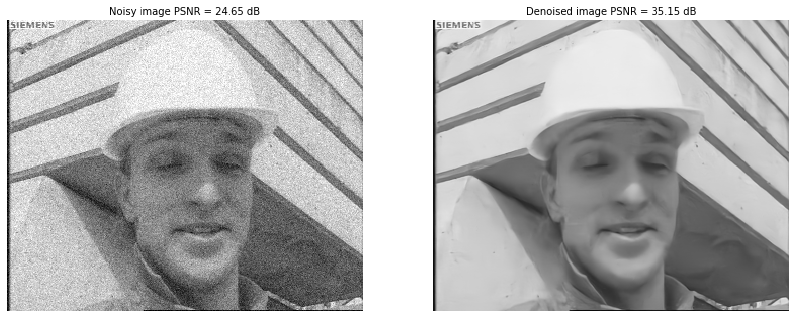

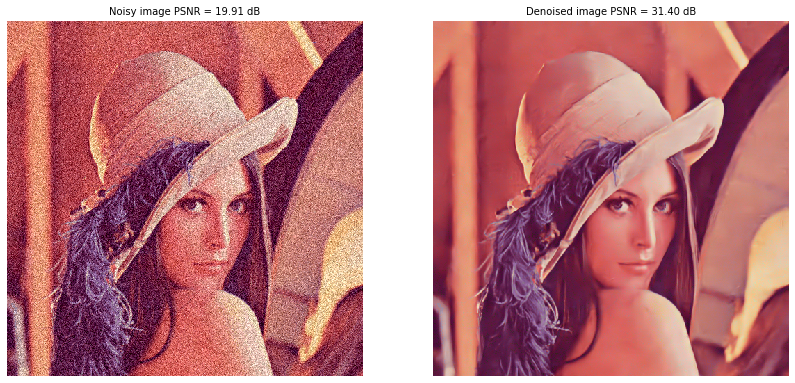

In [4]:
reference_images = ['testdata/fruits.png', 'testdata/barbara.png', 'testdata/cameraman.png',
                    'testdata/foreman.png', 'testdata/lena_color.png']

for image in reference_images:
    sigma = random.randrange(5, 40)

    img_ref = skimage.io.imread(image)
    img_n = addNoise(img_ref, sigma)

    im_out = denoiser_ircnn.run(img_n, sigma)

    _, psnr_n = mse_psnr(img_ref, img_n)
    _, psnr_d = mse_psnr(img_ref, im_out)

    visualize_image(img_n, im_out, psnr_n, psnr_d)